In [15]:
# Open animated GIF

from PIL import Image, ImageOps
import imageio.v3 as iio
import numpy as np

im = iio.imread('assets/frybove-input/fryba1.png')  # will be frame0
fryba1 = im[:, :, 0]
im = iio.imread('assets/frybove-input/fryba2.png')  # will be frame1
fryba2 = im[:, :, 0]
im = iio.imread('assets/frybove-input/fryba3.png')  # will be frame2
fryba3 = im[:, :, 0]
im = iio.imread('assets/frybove-input/fryba4.png')  # will be frame3
fryba4 = im[:, :, 0]
im = iio.imread('assets/frybove-input/fryba5.png')  # will be frame4
fryba5 = im[:, :, 0]

gif_fn = 'assets/navstevnici-1500.GIF'
im = Image.open(gif_fn)

# Iterate over frames, select every other frame
frames = []
for i in range(20, im.n_frames, 3):  # skip first 10 frames as the vido was lame captured
    im.seek(i)
    frame = np.array(im)
    frames.append(frame)
# Crop frames to shape (200, 320). Remove 30 lines from top and 10 from bottom
frames = [frame[30:-10] for frame in frames]


# Increase contrast by 30%
frames = [np.clip(frame * 1.2, 0, 255).astype(np.uint8) for frame in frames]

# Convert frames to grayscale. Ensure all values are integers
frames = [np.mean(frame, axis=2).astype(np.uint8) for frame in frames]

frames.insert(0, fryba1)
frames.insert(1, fryba2)
frames.insert(2, fryba3)
frames.insert(3, fryba4)
frames.insert(4, fryba5)
print(len(frames))

# Apply floyd-steinberg dithering to convert to 1-bit image
def floyd_steinberg_dithering(image):
    image = Image.fromarray(image)
    image = ImageOps.grayscale(image)
    image = ImageOps.autocontrast(image, cutoff=100)
    # image = image.convert('1')
    return image

frames = [np.array(floyd_steinberg_dithering(frame)) for frame in frames]


106


In [17]:
# Save as pickle file
import pickle
with open('assets/frames.pkl', 'wb') as f:
    pickle.dump(frames, f)


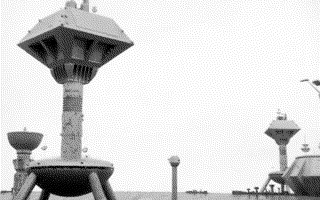

In [16]:
# Display frame
Image.fromarray(frames[5])
